# Clustering
## 10/17/2023
<a href="?print-pdf">print view</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

What is clustering?

Wikipedia: Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).

Generally speaking, clustering is NP-hard, so it is difficult to identify a provable optimal clustering.

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/800px-ClusterAnalysis_Mouse.svg.png">



# What is _similar_?

* *similarity*: larger number means _more_ similar
 * Tanimoto (or Jaccard) similarity of two sets:
    $$\frac{|A \cap B|}{|A \cup B|}$$
* *distance*: larger number means _less_ similar (zero means identical)
 * Euclidean distance (L2 norm) between $n$-dimensional vectors $u$ and $v$:
    $$\|u - v\|_2 = \sqrt{\sum_i^n (u_i - v_i)^2}$$
 * Cityblock (Manhattan) distance (L1 norm):
    $$\|u - v\|_1 = \sum_i^n|u_i - v_i|$$
 * Cosine distance between $n$-dimensional vectors $u$ and $v$:
    $$1 - \frac{u \cdot v}{\|u\|_2 \|v\|_2}$$

In [2]:
%%html
<div id="tanimotosim" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#tanimotosim';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the range for Tanimoto similarity?",
		answers: ['0...1','-inf...inf','0...inf','-1...1'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

Given two vectors $u = (0,1)$ and $v = (2,0)$

In [3]:
%%html
<div id="euclideanuv" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#euclideanuv';
	jQuery(divid).asker({
	    id: divid,
	    question: "What Euclidean distance between u and v?",
		answers: ['0','1','2','2.23','3','5'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

Given two vectors $u = (0,1)$ and $v = (2,0)$

In [4]:
%%html
<div id="cityblockuv" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#cityblockuv';
	jQuery(divid).asker({
	    id: divid,
	    question: "What cityblock distance between u and v?",
		answers: ['0','1','2','2.23','3','5'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

Given two vectors $u = (0,1)$ and $v = (2,0)$

In [5]:
%%html
<div id="cosineuv" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#cosineuv';
	jQuery(divid).asker({
	    id: divid,
	    question: "What cosine distance between u and v?",
		answers: ['0','1','2','2.23','3','5'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [6]:
import scipy.spatial.distance
help(scipy.spatial.distance)

Help on module scipy.spatial.distance in scipy.spatial:

NAME
    scipy.spatial.distance

DESCRIPTION
    Distance computations (:mod:`scipy.spatial.distance`)
    
    .. sectionauthor:: Damian Eads
    
    Function reference
    ------------------
    
    Distance matrix computation from a collection of raw observation vectors
    stored in a rectangular array.
    
    .. autosummary::
       :toctree: generated/
    
       pdist   -- pairwise distances between observation vectors.
       cdist   -- distances between two collections of observation vectors
       squareform -- convert distance matrix to a condensed one and vice versa
       directed_hausdorff -- directed Hausdorff distance between arrays
    
    Predicates for checking the validity of distance matrices, both
    condensed and redundant. Also contained in this module are functions
    for computing the number of observations in a distance matrix.
    
    .. autosummary::
       :toctree: generated/
    
       is

# k-means clustering 

In *k-means clustering* we are given a set of $d$-dimensional vectors and we want to identify *k* sets $S_i$ such that

$$\sum_{i=0}^k \sum_{x_j \in S_i} ||x_j - \mu_i||^2$$
is **minimized** where $\mu_i$ is the *mean* of cluster $S_i$.  That is, all points are close as possible to the 'center' of the cluster.

**Limitations**

   * Classical k-means requires that we be able to take an average of our points - *no arbitrary distance functions*.
   * Must provide $k$ as a parameter - bad $k$, bad clustering.



# k-means clustering 


**General algorithm**

   * Choose initial set of $k$ cluster centers (centroids/means).
   * Compute means of these clusters.
   * Reassign points using updated means.
   * Repeat

Will converge to **local** optimum.

https://bits.csb.pitt.edu/kmeans/

# scipy vector quantization

First let's make a toy data set...

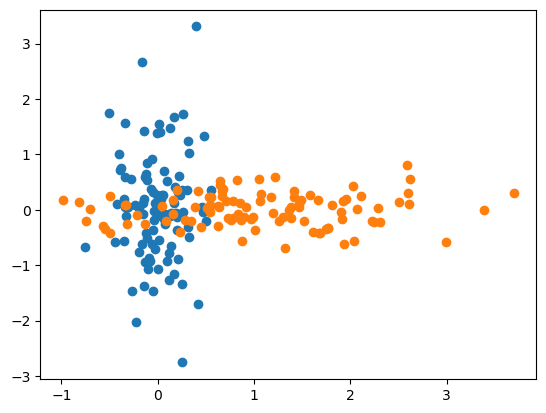

In [7]:
import scipy.cluster.vq as vq #vq: vector quantization
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
randpts1 = np.random.randn(100,2)/(4,1) #100 integer coordinates in the range [0:50],[0:50]
randpts2 = (np.random.randn(100,2)+(1,0))/(1,4)
plt.plot(randpts1[:,0],randpts1[:,1],'o',randpts2[:,0],randpts2[:,1],'o')
randpts = np.vstack((randpts1,randpts2))

# scipy vector quantization

In [8]:
(means,clusters) = vq.kmeans2(randpts,2)#returns tuple of means and cluster assignments

The means are the cluster centers

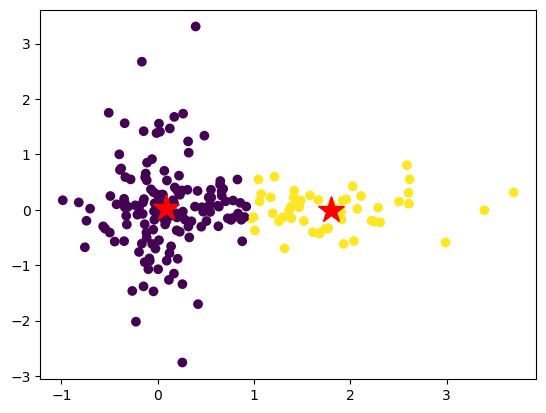

In [9]:
plt.scatter(randpts[:,0],randpts[:,1],c=clusters)
plt.plot(means[:,0],means[:,1],'*',ms=20,c='red');

## Changing k

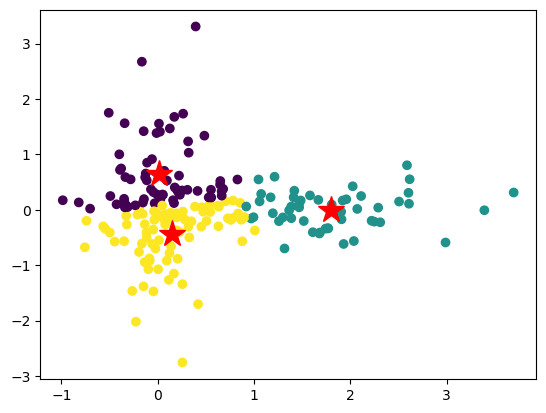

In [10]:
(means,clusters) = vq.kmeans2(randpts,3)
plt.scatter(randpts[:,0],randpts[:,1],c=clusters)
plt.plot(means[:,0],means[:,1],'*',ms=20,c='red');

## Changing k

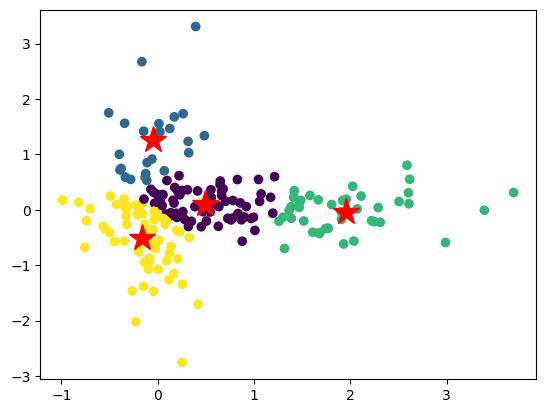

In [11]:
(means,clusters) = vq.kmeans2(randpts,4)
plt.scatter(randpts[:,0],randpts[:,1],c=clusters)
plt.plot(means[:,0],means[:,1],'*',ms=20,c='red');

In [12]:
%%html
<div id="kmean" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#kmean';
	jQuery(divid).asker({
	    id: divid,
	    question: "Will k-means always find the same set of clusters?",
		answers: ['Yes','No','Depends'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# scipy vector quantization

Vector quantization is just a fancy way to describe assigning clusters to new points.

In [13]:
newrand = np.random.randn(100,2)
code,dist = vq.vq(newrand,means)

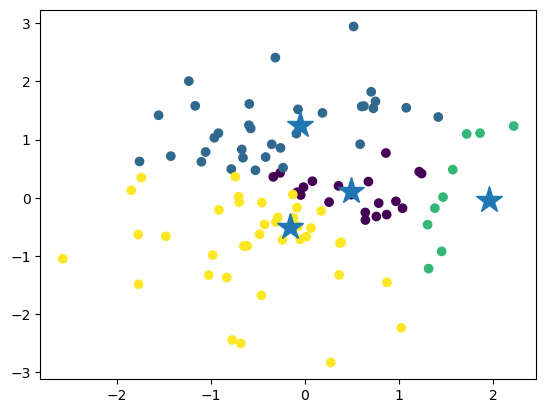

In [14]:
plt.scatter(newrand[:,0],newrand[:,1],c=code)
plt.plot(means[:,0],means[:,1],'*',ms=20);

In [15]:
%%html
<div id="clus1" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#clus1';
	jQuery(divid).asker({
	    id: divid,
	    question: "What sort of data would k-means have difficulty clustering?",
		answers: ['Expression data','Dose-response data','Protein structures','Sequences'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Hierarchical Clustering

Hierarchical clustering creates a heirarchy, where each cluster is formed from subclusters.  

<img width="400" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/800px-Iris_dendrogram.png">




# Agglomerative clustering

Agglomerative builds this hierarchy from the *bottom up*: start with all singleton clusters, find the two clusters that are closest, combine them into a cluster, repeat.

This requires there be a notion of distance between *clusters of items*, not just the items themselves.

**Important:** All you need is a distance function - you do *not* need to be able to take an average (as with k-means).  

# Distance (Linkage) Methods

<img src="imgs/linkage.png" style="float:right">

* **average**: 
   $$d(u,v) = \sum_{ij}\frac{d(u_i,v_j)}{|u||v|}$$
* **complete** or farthest point: 
   $$d(u,v) = \max(dist(u_i,v_j))$$
* **single** or nearest point: 
   $$d(u,v) = \min(dist(u_i,v_j))$$




In [16]:
%%html

<img src="imgs/clusterpoints.png">
<div id="cluspts" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#cluspts';
	jQuery(divid).asker({
	    id: divid,
	    question: "What cluster is closest to red by single linkage? complete?",
		answers: ['blue, blue','blue, yellow','yellow, blue','yellow, yellow'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# `linkage`

`scipy.cluster.hierarchy.linkage` creates a clustering hierarchy. It takes three parameters:
 * *y* the data or a precalculated distance matrix
 * *method* the linkage method (default single)
 * *metric* the distance metric to use (default euclidean)

In [17]:
import scipy.cluster.hierarchy as hclust
linkage_matrix = hclust.linkage(randpts) 

    A (n−1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n+i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [18]:
linkage_matrix.shape

(199, 4)

In [19]:
linkage_matrix

array([[1.49000000e+02, 1.71000000e+02, 4.46097932e-03, 2.00000000e+00],
       [4.60000000e+01, 7.20000000e+01, 6.85261819e-03, 2.00000000e+00],
       [1.60000000e+01, 7.30000000e+01, 1.51521318e-02, 2.00000000e+00],
       [1.37000000e+02, 1.57000000e+02, 1.53148351e-02, 2.00000000e+00],
       [1.19000000e+02, 1.89000000e+02, 1.78213509e-02, 2.00000000e+00],
       [1.22000000e+02, 1.98000000e+02, 2.04763202e-02, 2.00000000e+00],
       [1.34000000e+02, 2.00000000e+02, 2.35915430e-02, 3.00000000e+00],
       [1.38000000e+02, 1.87000000e+02, 2.65878878e-02, 2.00000000e+00],
       [2.40000000e+01, 6.90000000e+01, 2.93336673e-02, 2.00000000e+00],
       [6.00000000e+01, 9.60000000e+01, 2.99804179e-02, 2.00000000e+00],
       [1.82000000e+02, 1.85000000e+02, 3.14543289e-02, 2.00000000e+00],
       [1.54000000e+02, 1.96000000e+02, 3.38672911e-02, 2.00000000e+00],
       [9.00000000e+00, 1.76000000e+02, 3.54702089e-02, 2.00000000e+00],
       [3.90000000e+01, 2.12000000e+02, 3.56342391e

# Dendograms

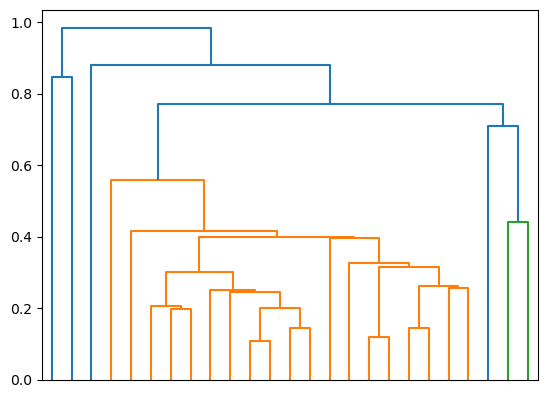

In [20]:
hclust.dendrogram(linkage_matrix,p=10,truncate_mode='level',no_labels=True);#show first 10 levels

*The cophenetic distance between two observations that have been clustered is defined to be the intergroup dissimilarity at which the two observations are first combined into a single cluster.  It is shown as the height of the U-links.*

# `fcluster`: extracting clusters from a hierarchy

`fcluster` takes a linkage matrix and returns a cluster assignment.  It takes a threshold value and a string specifying what method to use to form the cluster.

In [21]:
help(hclust.fcluster)

Help on function fcluster in module scipy.cluster.hierarchy:

fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)
    Form flat clusters from the hierarchical clustering defined by
    the given linkage matrix.
    
    Parameters
    ----------
    Z : ndarray
        The hierarchical clustering encoded with the matrix returned
        by the `linkage` function.
    t : scalar
        For criteria 'inconsistent', 'distance' or 'monocrit',
         this is the threshold to apply when forming flat clusters.
        For 'maxclust' or 'maxclust_monocrit' criteria,
         this would be max number of clusters requested.
    criterion : str, optional
        The criterion to use in forming flat clusters. This can
        be any of the following values:
    
          ``inconsistent`` :
              If a cluster node and all its
              descendants have an inconsistent value less than or equal
              to `t`, then all its leaf descendants belong to the
    

## Flatten based on distance threshold

In [22]:
clusters = hclust.fcluster(linkage_matrix,0.3,'distance')
len(set(clusters))

14

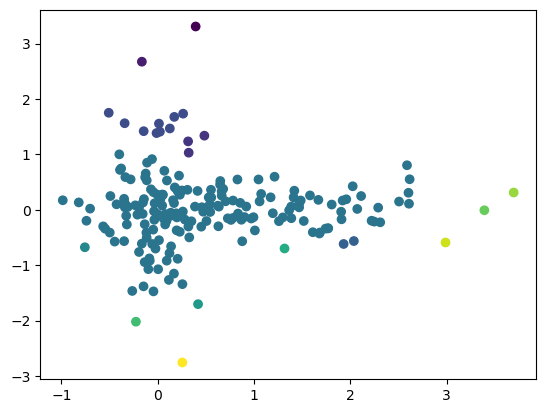

In [23]:
plt.scatter(randpts[:,0],randpts[:,1],c=clusters);

## Flatten based on number of clusters

In [24]:
clusters = hclust.fcluster(linkage_matrix,4,'maxclust')
len(set(clusters))

4

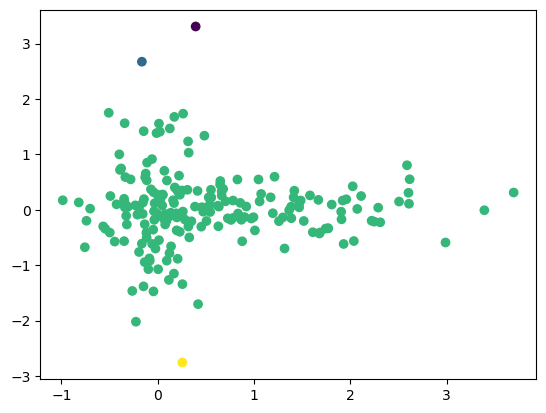

In [25]:
plt.scatter(randpts[:,0],randpts[:,1],c=clusters)

# `fclusterdata`

`fclusterdata` does both linkage and fcluster in one step.  Let's try out different linkage methods.

14

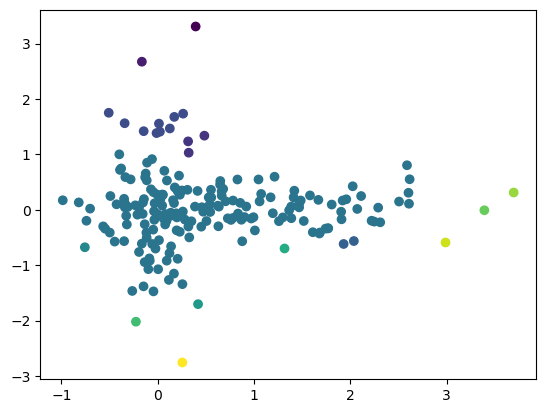

In [26]:
clusters = hclust.fclusterdata(randpts,.3,criterion='distance',method='single')
plt.scatter(randpts[:,0],randpts[:,1],c=clusters)
len(set(clusters))

63

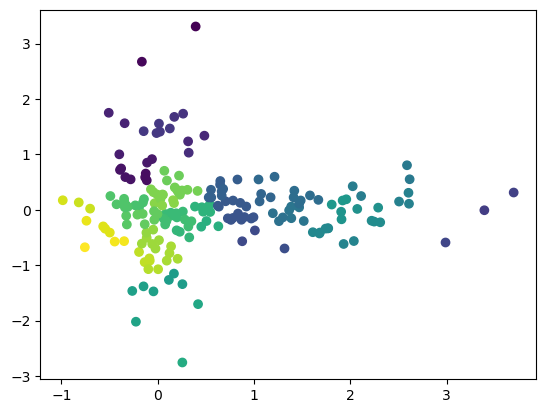

In [27]:
clusters = hclust.fclusterdata(randpts,.3,criterion='distance',method='complete')
plt.scatter(randpts[:,0],randpts[:,1],c=clusters);
len(set(clusters))

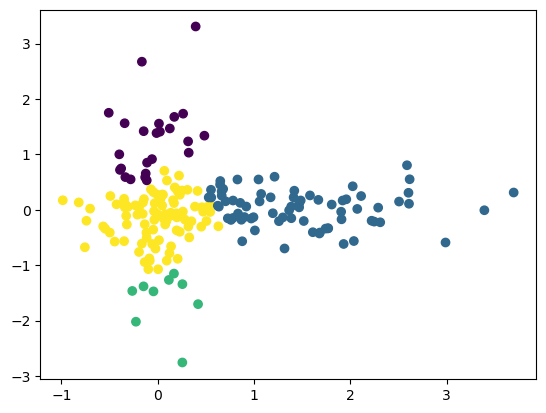

In [28]:
clusters = hclust.fclusterdata(randpts,4,'maxclust',method='complete')
plt.scatter(randpts[:,0],randpts[:,1],c=clusters);

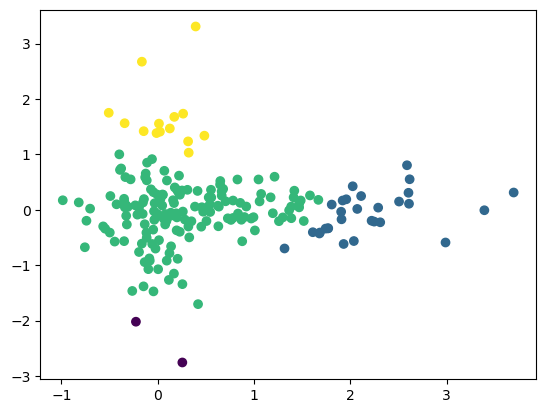

In [29]:
clusters = hclust.fclusterdata(randpts,4,'maxclust',method='average')
plt.scatter(randpts[:,0],randpts[:,1],c=clusters);

You can even use a non-Euclidean metric.

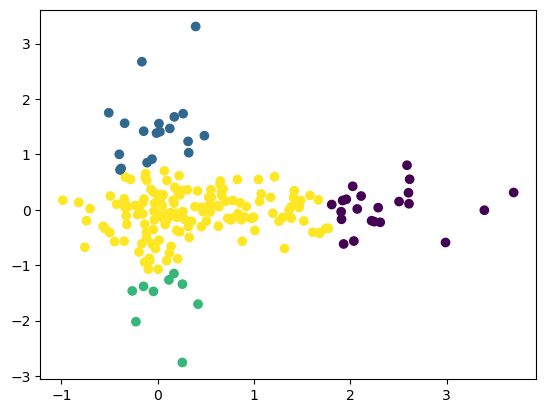

In [30]:
clusters = hclust.fclusterdata(randpts,4,'maxclust',method='complete',metric='cityblock')
plt.scatter(randpts[:,0],randpts[:,1],c=clusters);

In [31]:
import sklearn
import sklearn.datasets
roll,_=sklearn.datasets.make_swiss_roll()
roll = roll[:,[0,2]]


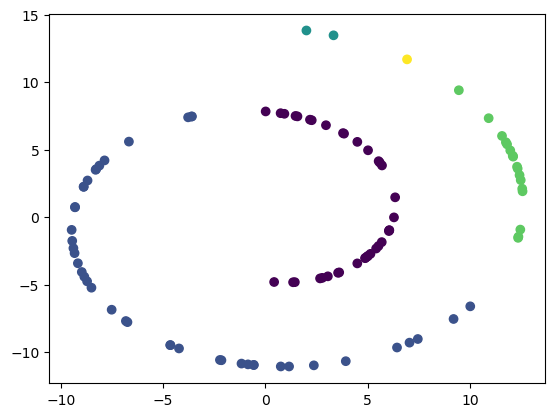

In [32]:
clusters=hclust.fclusterdata(roll,5,'maxclust',method='single')
plt.scatter(roll[:,0],roll[:,1],c=clusters)
plt.savefig('imgs/roll.png',bbox_inches='tight')

In [33]:
%%html

<img src="imgs/roll.png">
<div id="clusroll" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#clusroll';
	jQuery(divid).asker({
	    id: divid,
	    question: "What linkage was likely used to form these clusters?",
		answers: ['average','complete','single'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# `leaves_list`

A hierarchical cluster imposes an order on the leaves.  You can retrieve this ordering from the linkage matrix with `leaves_list`

In [34]:
hclust.leaves_list(linkage_matrix)

array([ 88,  93,  86,  66, 173,  67,  12,  43,  53,   5,  40,  61,  49,
        79,  30,  13,  41,  68,  45, 108, 158,  11,  44,  81,  78, 197,
       107, 182, 185, 190, 148, 104, 199, 101, 105, 152, 165, 117, 144,
       142, 132, 139,  56,  65, 180, 135, 141,  32,  89,  42,  10,  74,
       128,   7,  51,  47,  52,  24,  69,  28,  33,  77,  91,  23,  36,
       102, 133, 159,  18,   6,  99,  25,  95, 160, 193,  64,  26, 127,
       115, 147, 110, 154, 196, 162, 183, 121,  84,  38,  83, 138, 187,
       122, 198,  22, 100, 155, 120,   8, 194, 125, 184, 192, 168, 191,
       169, 114, 126, 151,   1, 118,  21,  85,  97,  98,  92,   0,  29,
        27, 156, 186,  15,   2,  20,  87,   3, 174,  90, 172, 140,  17,
       130, 131,  63,  82,  14,  76,  80,  34, 153,  16,  73,  71,  37,
        62,  39,   9, 176,  57,   4,  46,  72,  35,  94,  19, 195,  48,
        59,  70,  31,  55, 137, 157,  60,  96,  58,  75,  54,  50, 188,
       134, 149, 171, 116, 119, 189, 175, 143, 106, 111, 163, 11

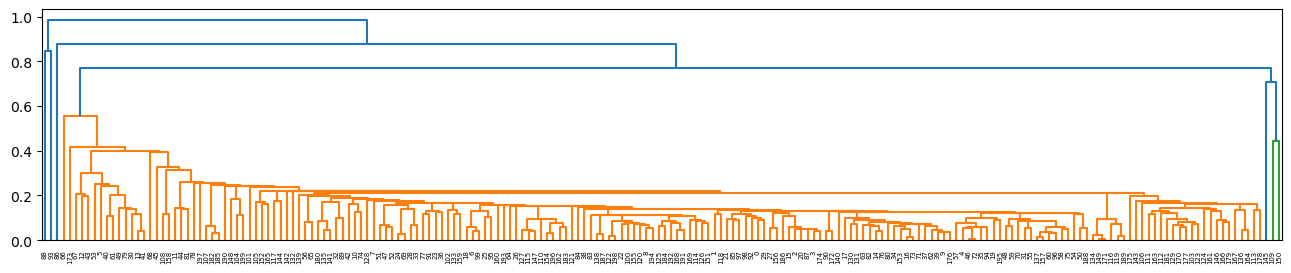

In [35]:
plt.figure(figsize=(16,3))
hclust.dendrogram(linkage_matrix);


In [36]:
%%html
<div id="listorder" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#listorder';
	jQuery(divid).asker({
	    id: divid,
	    question: "Is this order unique for a given linkage matrix?",
		answers: ['Yes','No'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Project: Cluster Expression Data

 * Download [https://asinansaglam.github.io/python_bio_2022/files/Spellman.csv](https://asinansaglam.github.io/python_bio_2022/files/Spellman.csv)
 * read the expression data into a numpy array (hint: `np.genfromtxt`)
 * cluster it with the default parameters
 * retrieve the leaves
 * reorder the orginal data according the the leaf order
 * display the result as a heatmap (`plt.matshow`)
 * try different distance metrics and linkages - what gives the best result?

In [37]:
!wget https://asinansaglam.github.io/python_bio_2022/files/Spellman.csv

--2023-10-16 16:47:44--  https://asinansaglam.github.io/python_bio_2022/files/Spellman.csv
Resolving asinansaglam.github.io (asinansaglam.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to asinansaglam.github.io (asinansaglam.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 609183 (595K) [text/csv]
Saving to: 'Spellman.csv.3'

     0K .......... .......... .......... .......... ..........  8% 9.22M 0s
    50K .......... .......... .......... .......... .......... 16% 20.2M 0s
   100K .......... .......... .......... .......... .......... 25% 16.4M 0s
   150K .......... .......... .......... .......... .......... 33% 20.8M 0s
   200K .......... .......... .......... .......... .......... 42% 64.9M 0s
   250K .......... .......... .......... .......... .......... 50% 16.4M 0s
   300K .......... .......... .......... .......... .......... 58% 55.0M 0s
   350K .......... .......... .......... .......... ...

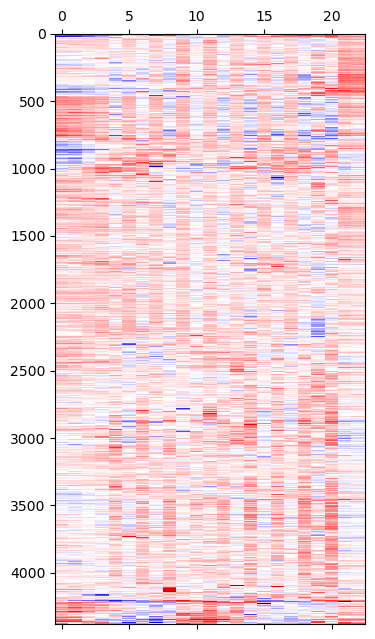

In [38]:
from matplotlib.pylab import cm
import numpy as np
import scipy.cluster.hierarchy as hclust
import matplotlib.pyplot as plt
data = np.genfromtxt('Spellman.csv',skip_header=1,delimiter=',')[:,1:]
Z = hclust.linkage(data,method='complete')
leaves = hclust.leaves_list(Z)
ordered = data[leaves]
plt.matshow(ordered,aspect=0.01,cmap=cm.seismic);

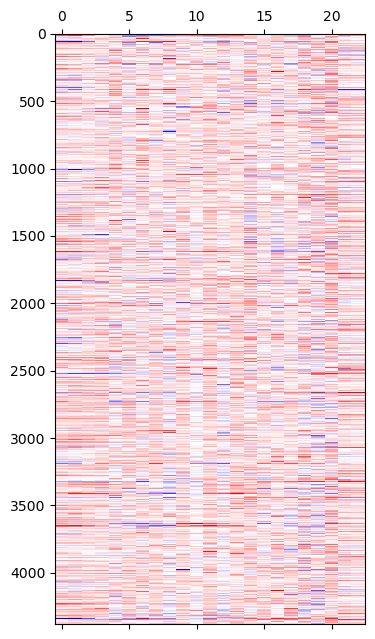

In [39]:
plt.matshow(data,aspect=0.01,cmap=cm.seismic);